<font size = 4 color='orange'>Diabeties prediction problem EDA

<Font size=3 color='darkblue'>Importing Libraries

In [1]:
import pandas as pd #To read and edit tabular data
import numpy as np #To perform array/matrix operations
import math #For mathematical opeartions
import matplotlib.pyplot as plt #To perform plotting
%matplotlib inline
import seaborn as sns  #To perform visualization
sns.set_style('whitegrid')
import warnings #To ignore warnings
warnings.filterwarnings('ignore')

<Font size=3 color='darkblue'>Reading the data

In [3]:
data_diabeties = pd.read_csv('diabetes.csv')

In [6]:
data_diabeties.shape

(390, 16)

In [7]:
data_diabeties.dtypes

patient_number      int64
cholesterol         int64
glucose             int64
hdl_chol            int64
chol_hdl_ratio     object
age                 int64
gender             object
height              int64
weight              int64
bmi                object
systolic_bp         int64
diastolic_bp        int64
waist               int64
hip                 int64
waist_hip_ratio    object
diabetes           object
dtype: object

Checking the head of the data

In [4]:
data_diabeties.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,"3,9",19,female,61,119,"22,5",118,70,32,38,"0,84",No diabetes
1,2,146,79,41,"3,6",19,female,60,135,"26,4",108,58,33,40,"0,83",No diabetes
2,3,217,75,54,4,20,female,67,187,"29,3",110,72,40,45,"0,89",No diabetes
3,4,226,97,70,"3,2",20,female,64,114,"19,6",122,64,31,39,"0,79",No diabetes
4,5,164,91,67,"2,4",20,female,70,141,"20,2",122,86,32,39,"0,82",No diabetes


<Font size=2.5 color='purple'>__Observation:__<br>
    1. Featues like chol_dl_ratio, bmi and waist_hip_ration have ',' in it and we need to convert them into ratios

<Font size=3 color='darkblue'>General Info of the data

In [4]:
data_diabeties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   patient_number   390 non-null    int64 
 1   cholesterol      390 non-null    int64 
 2   glucose          390 non-null    int64 
 3   hdl_chol         390 non-null    int64 
 4   chol_hdl_ratio   390 non-null    object
 5   age              390 non-null    int64 
 6   gender           390 non-null    object
 7   height           390 non-null    int64 
 8   weight           390 non-null    int64 
 9   bmi              390 non-null    object
 10  systolic_bp      390 non-null    int64 
 11  diastolic_bp     390 non-null    int64 
 12  waist            390 non-null    int64 
 13  hip              390 non-null    int64 
 14  waist_hip_ratio  390 non-null    object
 15  diabetes         390 non-null    object
dtypes: int64(11), object(5)
memory usage: 48.9+ KB


<Font size=3 color='darkblue'>Checking for the imbalance in the data

<AxesSubplot:xlabel='diabetes', ylabel='count'>

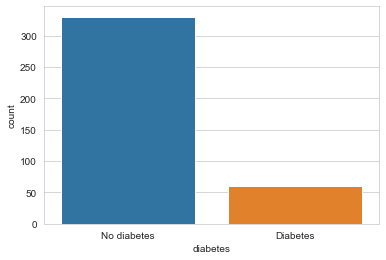

In [8]:
sns.countplot(data_diabeties['diabetes'])

<Font size=3 color='darkblue'>Plotting heatmap to check for missing values

<AxesSubplot:>

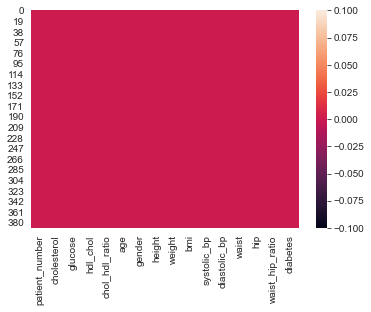

In [6]:
sns.heatmap(data_diabeties.isna())

<font size=2.5 color='Purple'>__Initial Observations:__<br>
    1. There are 390 data points in the data<br>
    2. A total of 15 Independent features and a 'binary target variable'<br>
    3. There are no missing values in the data<br>
    4. We have a highly imbalanced data

<Font size=3 color='darkblue'>Checking the repeating data points

In [10]:
print("Does the datapoints are repeated: ",
      len(data_diabeties.patient_number)!= len(data_diabeties.patient_number.unique()))

Does the datapoints are repeated:  False


<Font size=4 color='Orange'>Data Cleaning

In [12]:
#Function to convert ratio values with ',' to actual rations
def ratio(value):
    if ',' in value:
        return float(value.replace(',','.'))
    else:
        return int(value)

In [13]:
#Converting chol_hdl_ratio
data_diabeties['chol_hdl_ratio'] = data_diabeties['chol_hdl_ratio'].apply(lambda x: ratio(x))

#Converting chol_hdl_ratio
data_diabeties['bmi'] = data_diabeties['bmi'].apply(lambda x: ratio(x))

#Converting chol_hdl_ratio
data_diabeties['waist_hip_ratio'] = data_diabeties['waist_hip_ratio'].apply(lambda x: ratio(x))

In [14]:
data_diabeties.head()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes
0,1,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes
1,2,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes
2,3,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes
3,4,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes
4,5,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes


<font size=2.5 color='Purple'>__Observation:__<br>
    1. All the three ratio features are converted into Numeric features

<Font size=4 color='Orange'>Exploratory Data Analysis

<Font size=3 color='darkblue'>Categorical Features: Gender

In [12]:
data_diabeties.describe(include='object')

,gender,diabetes
count,390,390
unique,2,2
top,female,No diabetes
freq,228,330


<Font size=2.5 color='blue'>Checking if gender categories are balanced

<AxesSubplot:xlabel='gender', ylabel='count'>

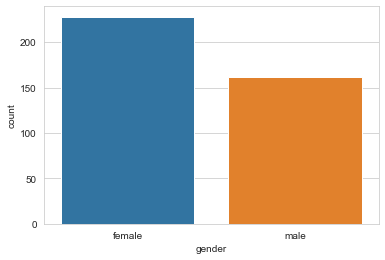

In [412]:
sns.countplot(data_diabeties.gender)

<font size=2.5 color='Purple'>__Observation:__<br>
    1. there is no significant bias in the 'Gender' Category

<Font size=2.5 color='blue'>Checking if gender is impacting the prediction or not

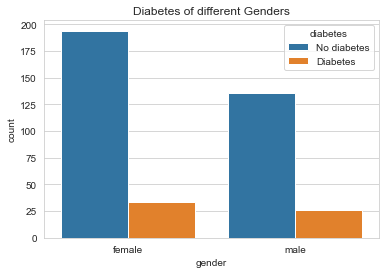

In [413]:
sns.countplot(x='gender', data=data_diabeties, hue='diabetes')
plt.title('Diabetes of different Genders')
plt.show()

<font size=2.5 color='Purple'>__Observation:__<br>
    1. Female gender is less likely to have Diabetes than Male gender

<Font size=3 color='darkblue'>Numerical Features: 

In [13]:
data_diabeties.describe()

,patient_number,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,195.500000,207.230769,107.338462,50.266667,4.524615,46.774359,65.951282,177.407692,28.775641,137.133333,83.289744,37.869231,42.992308,0.881385
std,112.727548,44.666005,53.798188,17.279069,1.736634,16.435911,3.918867,40.407824,6.600915,22.859528,13.498192,5.760947,5.664342,0.073212
min,1.000000,78.000000,48.000000,12.000000,1.500000,19.000000,52.000000,99.000000,15.200000,90.000000,48.000000,26.000000,30.000000,0.680000
25%,98.250000,179.000000,81.000000,38.000000,3.200000,34.000000,63.000000,150.250000,24.100000,122.000000,75.000000,33.000000,39.000000,0.830000
50%,195.500000,203.000000,90.000000,46.000000,4.200000,44.500000,66.000000,173.000000,27.800000,136.000000,82.000000,37.000000,42.000000,0.880000
75%,292.750000,229.000000,107.750000,59.000000,5.400000,60.000000,69.000000,200.000000,32.275000,148.000000,90.000000,41.000000,46.000000,0.930000
max,390.000000,443.000000,385.000000,120.000000,19.300000,92.000000,76.000000,325.000000,55.800000,250.000000,124.000000,56.000000,64.000000,1.140000


In [414]:
#dropping the patient number column as it is just acts as a serial number
data_diabeties.drop("patient_number", axis=1, inplace=True)

<Font size=2.8 color='darkblue'>Checking the correlation of the numeric features with the target label

In [415]:
#convert target variable into numeric label
data_diabeties['target_num'] = np.where(data_diabeties['diabetes']=='Diabetes', 1, 0)

In [416]:
#checking the head
data_diabeties.head()

,cholesterol,glucose,hdl_chol,chol_hdl_ratio,age,gender,height,weight,bmi,systolic_bp,diastolic_bp,waist,hip,waist_hip_ratio,diabetes,target_num
0,193,77,49,3.9,19,female,61,119,22.5,118,70,32,38,0.84,No diabetes,0
1,146,79,41,3.6,19,female,60,135,26.4,108,58,33,40,0.83,No diabetes,0
2,217,75,54,4.0,20,female,67,187,29.3,110,72,40,45,0.89,No diabetes,0
3,226,97,70,3.2,20,female,64,114,19.6,122,64,31,39,0.79,No diabetes,0
4,164,91,67,2.4,20,female,70,141,20.2,122,86,32,39,0.82,No diabetes,0


<AxesSubplot:>

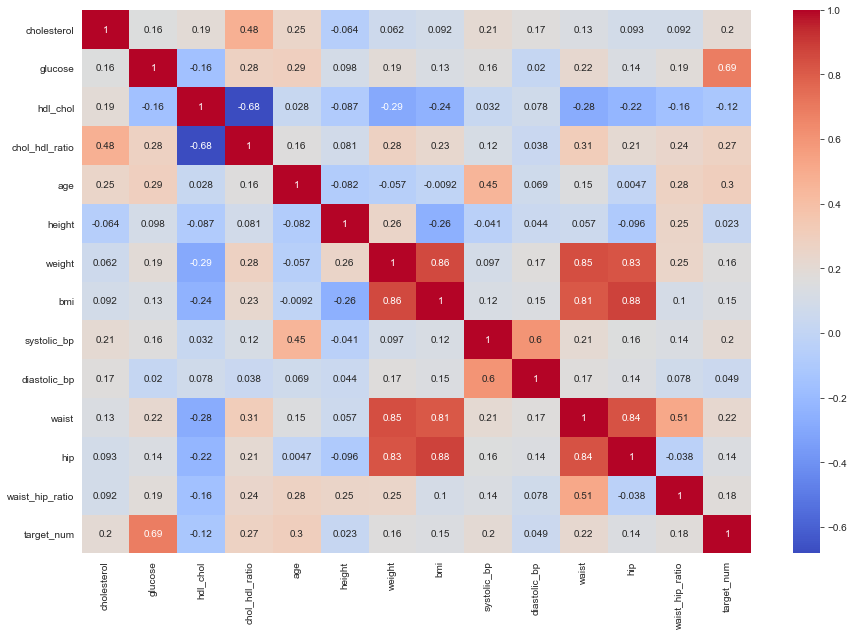

In [417]:
plt.figure(figsize=(15,10))
sns.heatmap(data_diabeties.corr(), annot=True, cmap='coolwarm')

<font size=2.5 color='Purple'>__Observation:__<br>
1. There features which have **_no correlation_** with the target are<br>
    a. height<br>
    b. diastolic_bp<br>
    We are going to drop these features<br>
2. There is **_high correlation_** between 'bmi' with<br>
    a. weight<br>
    c. waist<br>
    d. hip<br>
    we are going to keep the 'bmi' and remove the others
3. There is **_high correlation_** between 'hdl_col' with<br>
    a. chol_hdl_ratio<br>
    we are going to keep the 'chol_hdl_ratio' and remove the others

In [418]:
#dropping features 
data_diabeties.drop(['height', 'diastolic_bp', 'weight', 'waist', 'hip', 'hdl_chol', 'target_num'], axis=1, inplace=True)

<Font size=2.5 color='blue'>Checking the distributions of Numerical Data

In [419]:
numeric_columns = data_diabeties.select_dtypes(include='number').columns

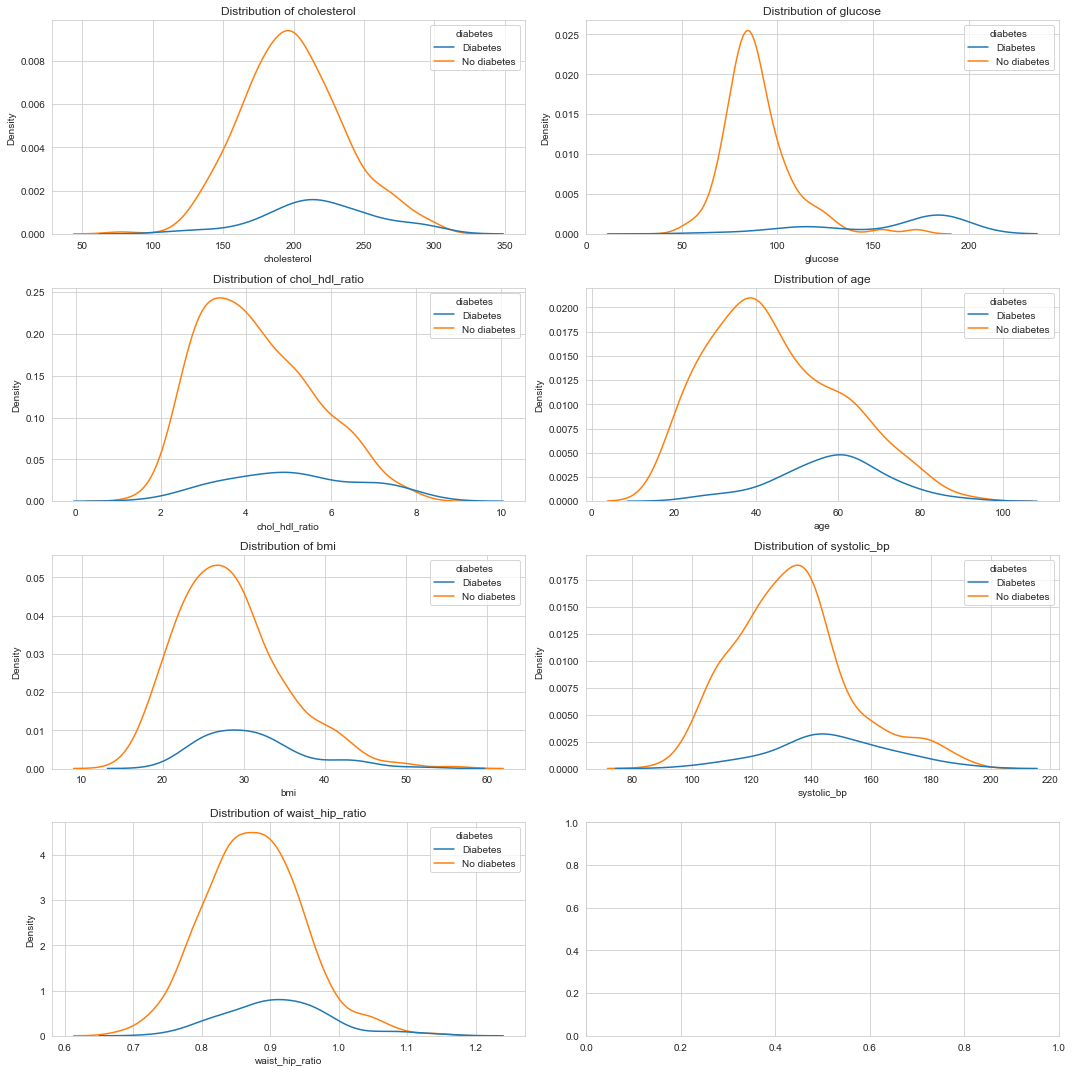

In [439]:
#plotting distribution plots for all the features
fig, axes = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

for ax, col in zip(axes.flatten(), numeric_columns):
    sns.kdeplot(ax=ax, data=data_diabeties, x=col, hue='diabetes')
    ax.set_title("Distribution of "+str(col))
    plt.tight_layout()

<font size=2.5 color='Purple'>__Observation:__<br>
1. There is more **_Skewness_** in the features<br>
2. When need to remove the outliers to reduce the skewness in the data    

<Font size=2.8 color='darkblue'>1. Cholestrol

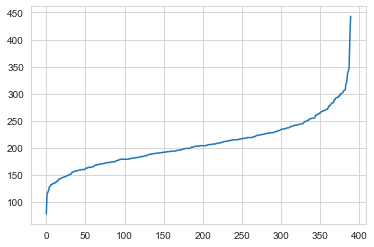

In [15]:
plt.plot(range(0, 390), sorted(data_diabeties['cholesterol'].values))

In [18]:
i = 99
while i<=100:
    print(round(i,2), np.percentile(data_diabeties['cholesterol'].values, i))
    i +=0.1

99 337.55000000000007
99.1 339.4950000000001
99.2 341.4399999999999
99.3 343.38499999999965
99.4 345.3299999999997
99.5 350.1349999999939
99.6 372.30799999999124
99.7 394.48099999998857
99.8 412.65799999999257
99.9 427.82899999999074
100.0 442.99999999999113


In [423]:
#Checking last 50 values to identify the outliers
np.array(sorted(data_diabeties['cholesterol'].values)[-50:])

array([255, 255, 255, 255, 260, 260, 261, 262, 263, 263, 265, 266, 267,
       268, 268, 269, 269, 270, 271, 271, 273, 277, 277, 279, 281, 283,
       283, 284, 289, 289, 292, 293, 293, 293, 296, 296, 300, 300, 301,
       302, 305, 306, 307, 318, 322, 337, 342, 347, 404, 443], dtype=int64)

<font size=2.5 color='Purple'>__Observation:__<br>
    The values above 300 are causing skewness in the data. so we'll replace them with local median.

In [23]:
data_diabeties['cholesterol'][data_diabeties['diabetes']=="Diabetes"].median()

219.0

In [424]:
#Getting the median
med_dia = data_diabeties['cholesterol'][data_diabeties['diabetes']=="Diabetes"].median()
med_nodia = data_diabeties['cholesterol'][data_diabeties['diabetes']=="No diabetes"].median()

#splitting the data into separate data frames based on the label
df_dia = data_diabeties[data_diabeties['diabetes']=='Diabetes']
df_nodia = data_diabeties[data_diabeties['diabetes']=='No diabetes']

#replacing the outliers
df_dia['cholesterol'] = df_dia['cholesterol'].apply(lambda x : med_dia if(x>300) else x)
df_nodia['cholesterol'] = df_nodia['cholesterol'].apply(lambda x : med_nodia if(x>300) else x)

#joining the dataframes into one.
data_diabeties = pd.concat([df_dia, df_nodia])

<Font size=2.8 color='darkblue'>2. glucose

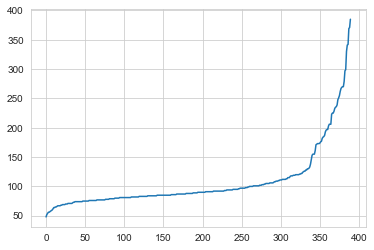

In [425]:
plt.plot(range(0, 390), sorted(data_diabeties['glucose'].values))

In [426]:
#Checking last 50 values to identify the outliers
np.array(sorted(data_diabeties['glucose'].values)[-100:])

array([106, 107, 108, 108, 109, 109, 109, 110, 110, 111, 111, 111, 112,
       112, 112, 112, 112, 113, 113, 115, 115, 115, 117, 118, 118, 118,
       119, 119, 119, 120, 120, 120, 120, 120, 121, 121, 122, 122, 124,
       125, 126, 126, 128, 128, 130, 130, 131, 133, 138, 145, 153, 155,
       155, 155, 161, 171, 172, 173, 173, 173, 174, 176, 177, 182, 184,
       185, 187, 193, 196, 197, 197, 203, 206, 206, 206, 223, 225, 225,
       228, 233, 235, 236, 239, 248, 251, 255, 262, 267, 269, 270, 270,
       279, 297, 299, 330, 341, 342, 369, 371, 385], dtype=int64)

<font size=2.5 color='Purple'>__Observation:__<br>
    There is a spike in values after 190. so we'll keep the threshold as 190 and replace others with local median.

In [427]:
#Getting the median
med_dia = data_diabeties['glucose'][data_diabeties['diabetes']=="Diabetes"].median()
med_nodia = data_diabeties['glucose'][data_diabeties['diabetes']=="No diabetes"].median()

#splitting the data into separate data frames based on the label
df_dia = data_diabeties[data_diabeties['diabetes']=='Diabetes']
df_nodia = data_diabeties[data_diabeties['diabetes']=='No diabetes']

#replacing the outliers
df_dia['glucose'] = df_dia['glucose'].apply(lambda x : med_dia if(x>190) else x)
df_nodia['glucose'] = df_nodia['glucose'].apply(lambda x : med_nodia if(x>190) else x)

#joining the dataframes into one.
data_diabeties = pd.concat([df_dia, df_nodia])

<Font size=2.8 color='darkblue'>3. chol_hdl_ratio

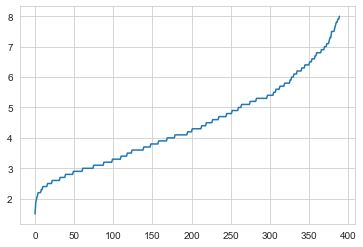

In [431]:
plt.plot(range(0, 390), sorted(data_diabeties['chol_hdl_ratio'].values))

In [432]:
#Checking last 50 values to identify the outliers
np.array(sorted(data_diabeties['chol_hdl_ratio'].values)[-50:])

array([6.2, 6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5,
       6.5, 6.6, 6.6, 6.6, 6.6, 6.7, 6.7, 6.8, 6.8, 6.8, 6.8, 6.8, 6.8,
       6.9, 6.9, 6.9, 6.9, 7. , 7. , 7. , 7.1, 7.1, 7.1, 7.2, 7.3, 7.3,
       7.5, 7.5, 7.5, 7.5, 7.6, 7.7, 7.8, 7.8, 7.9, 7.9, 8. ])

<font size=2.5 color='Purple'>__Observation:__<br>
    There is a spike in values after 8.0. so we'll keep the threshold as 8.0 and replace others with local median.

In [433]:
#Getting the median
med_dia = data_diabeties['chol_hdl_ratio'][data_diabeties['diabetes']=="Diabetes"].median()
med_nodia = data_diabeties['chol_hdl_ratio'][data_diabeties['diabetes']=="No diabetes"].median()

#splitting the data into separate data frames based on the label
df_dia = data_diabeties[data_diabeties['diabetes']=='Diabetes']
df_nodia = data_diabeties[data_diabeties['diabetes']=='No diabetes']

#replacing the outliers
df_dia['chol_hdl_ratio'] = df_dia['chol_hdl_ratio'].apply(lambda x : med_dia if(x>8.0) else x)
df_nodia['chol_hdl_ratio'] = df_nodia['chol_hdl_ratio'].apply(lambda x : med_nodia if(x>8.0) else x)

#joining the dataframes into one.
data_diabeties = pd.concat([df_dia, df_nodia])

<Font size=2.8 color='darkblue'>4. bmi

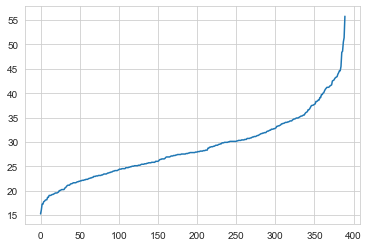

In [442]:
plt.plot(range(0, 390), sorted(data_diabeties['bmi'].values))

In [444]:
#Checking last 50 values to identify the outliers
np.array(sorted(data_diabeties['bmi'].values)[-50:])

array([36.1, 36.2, 36.6, 36.6, 36.8, 37.1, 37.4, 37.5, 37.5, 37.6, 37.7,
       37.8, 38.3, 38.3, 38.4, 38.6, 38.6, 39.1, 39.1, 39.7, 39.7, 40. ,
       40.1, 40.5, 40.8, 41. , 41.2, 41.2, 41.2, 41.3, 41.5, 41.6, 41.7,
       42.5, 42.6, 42.7, 43. , 43.2, 43.3, 43.4, 43.9, 44.2, 44.6, 44.6,
       45.5, 48.4, 48.6, 50.5, 51.4, 55.8])

<font size=2.5 color='Purple'>__Observation:__<br>
    There is a spike in values after 45.5. so we'll keep the threshold as 46 and replace others with local median.

In [445]:
#Getting the median
med_dia = data_diabeties['bmi'][data_diabeties['diabetes']=="Diabetes"].median()
med_nodia = data_diabeties['bmi'][data_diabeties['diabetes']=="No diabetes"].median()

#splitting the data into separate data frames based on the label
df_dia = data_diabeties[data_diabeties['diabetes']=='Diabetes']
df_nodia = data_diabeties[data_diabeties['diabetes']=='No diabetes']

#replacing the outliers
df_dia['bmi'] = df_dia['bmi'].apply(lambda x : med_dia if(x>46) else x)
df_nodia['bmi'] = df_nodia['bmi'].apply(lambda x : med_nodia if(x>46) else x)

#joining the dataframes into one.
data_diabeties = pd.concat([df_dia, df_nodia])

<Font size=2.8 color='darkblue'>5. systolic_bp

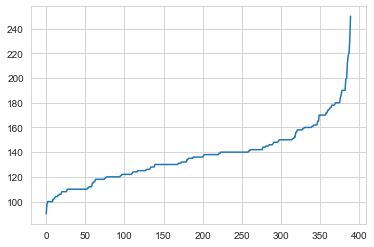

In [434]:
plt.plot(range(0, 390), sorted(data_diabeties['systolic_bp'].values))

In [435]:
#Checking last 50 values to identify the outliers
np.array(sorted(data_diabeties['systolic_bp'].values)[-50:])

array([161, 161, 162, 162, 162, 162, 162, 165, 165, 170, 170, 170, 170,
       170, 170, 170, 170, 170, 172, 172, 174, 174, 175, 176, 176, 178,
       178, 178, 178, 179, 180, 180, 180, 180, 180, 180, 184, 186, 190,
       190, 190, 190, 190, 199, 200, 212, 218, 220, 230, 250], dtype=int64)

<font size=2.5 color='Purple'>__Observation:__<br>
    There is a spike in values after 190. so we'll keep the threshold as 190 and replace others with local median.

In [436]:
#Getting the median
med_dia = data_diabeties['systolic_bp'][data_diabeties['diabetes']=="Diabetes"].median()
med_nodia = data_diabeties['systolic_bp'][data_diabeties['diabetes']=="No diabetes"].median()

#splitting the data into separate data frames based on the label
df_dia = data_diabeties[data_diabeties['diabetes']=='Diabetes']
df_nodia = data_diabeties[data_diabeties['diabetes']=='No diabetes']

#replacing the outliers
df_dia['systolic_bp'] = df_dia['systolic_bp'].apply(lambda x : med_dia if(x>190) else x)
df_nodia['systolic_bp'] = df_nodia['systolic_bp'].apply(lambda x : med_nodia if(x>190) else x)

#joining the dataframes into one.
data_diabeties = pd.concat([df_dia, df_nodia])

<Font size=2.8 color='darkblue'>6. waist_hip_ratio

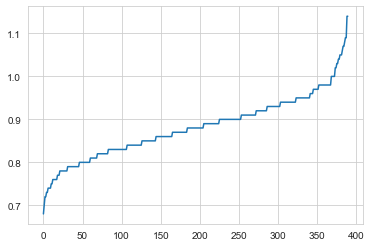

In [447]:
plt.plot(range(0, 390), sorted(data_diabeties['waist_hip_ratio'].values))

In [449]:
#Checking last 50 values to identify the outliers
np.array(sorted(data_diabeties['waist_hip_ratio'].values)[-50:])

array([0.95, 0.96, 0.96, 0.96, 0.96, 0.97, 0.97, 0.97, 0.97, 0.97, 0.97,
       0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.02, 1.02, 1.03, 1.03, 1.04, 1.04, 1.05, 1.05, 1.05, 1.06, 1.07,
       1.07, 1.08, 1.09, 1.09, 1.14, 1.14])

<font size=2.5 color='Purple'>__Observation:__<br>
    There is a spike in values after 1. so we'll keep the threshold as 1 and replace others with local median.

In [452]:
#Getting the median
med_dia = data_diabeties['waist_hip_ratio'][data_diabeties['diabetes']=="Diabetes"].median()
med_nodia = data_diabeties['waist_hip_ratio'][data_diabeties['diabetes']=="No diabetes"].median()

#splitting the data into separate data frames based on the label
df_dia = data_diabeties[data_diabeties['diabetes']=='Diabetes']
df_nodia = data_diabeties[data_diabeties['diabetes']=='No diabetes']

#replacing the outliers
df_dia['waist_hip_ratio'] = df_dia['waist_hip_ratio'].apply(lambda x : med_dia if(x>1) else x)
df_nodia['waist_hip_ratio'] = df_nodia['waist_hip_ratio'].apply(lambda x : med_nodia if(x>1) else x)

#joining the dataframes into one.
data_diabeties = pd.concat([df_dia, df_nodia])

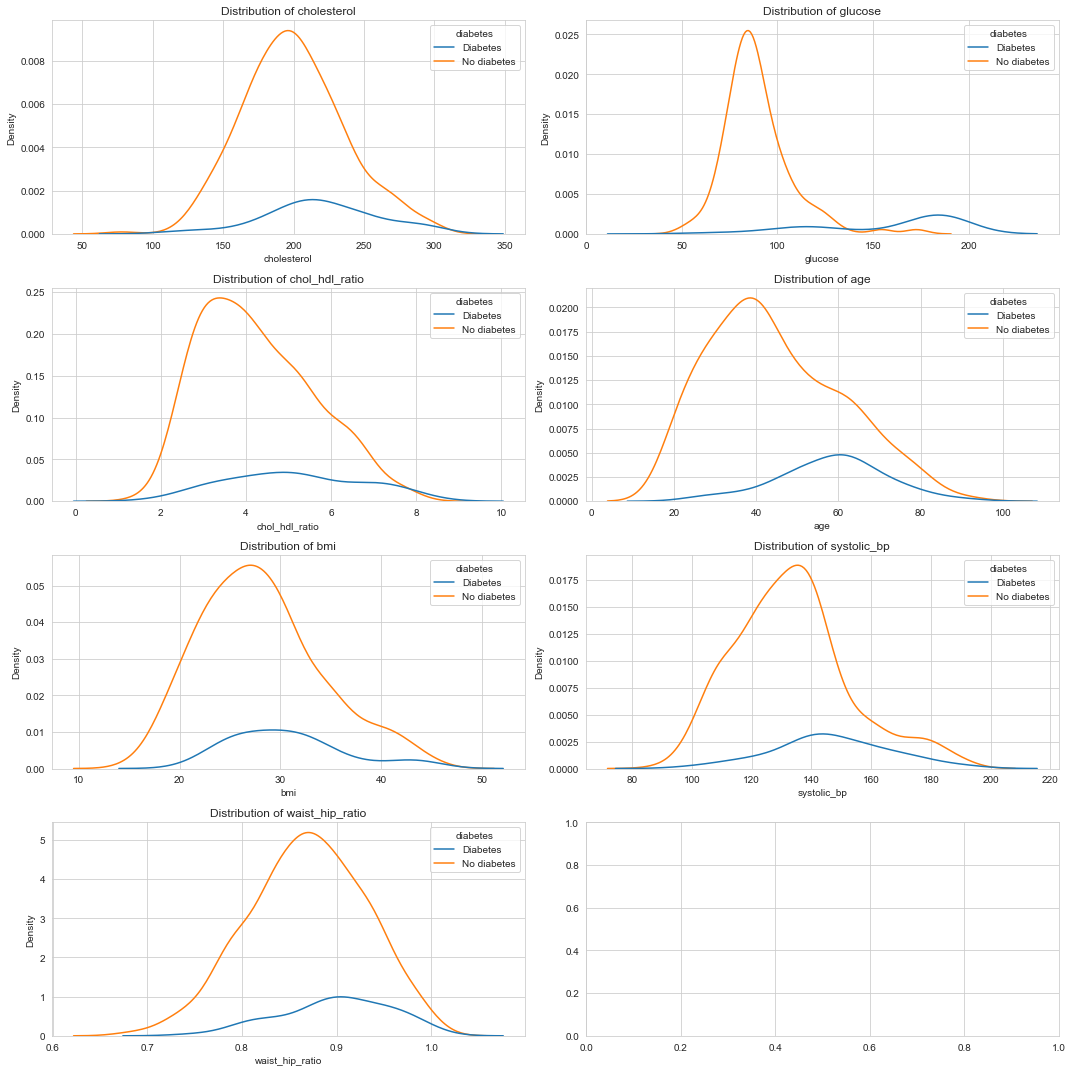

In [461]:
#plotting distribution plots for all the features
fig, axes = plt.subplots(4, 2)
fig.set_figheight(15)
fig.set_figwidth(15)

for ax, col in zip(axes.flatten(), numeric_columns):
    sns.kdeplot(ax=ax, data=data_diabeties, x=col, hue='diabetes')
    ax.set_title("Distribution of "+str(col))
    plt.tight_layout()

<font size=2.5 color='Purple'>__Observation:__<br>
    Now the numerical features are less skewed.

<font size=4 color='orange'> EDA on diabetes data is done

In [457]:
data_diabeties.head()

,cholesterol,glucose,chol_hdl_ratio,age,gender,bmi,systolic_bp,waist_hip_ratio,diabetes
40,220.0,60.0,3.3,26,male,21.5,136.0,0.85,Diabetes
64,194.0,186.0,5.1,29,female,24.7,120.0,0.83,Diabetes
82,191.0,155.0,3.3,31,female,43.3,140.0,0.95,Diabetes
117,245.0,119.0,5.2,36,male,28.9,150.0,0.88,Diabetes
139,203.0,186.0,4.7,38,female,42.5,136.0,0.87,Diabetes


<Font size=3 color='darkblue'>Let's save the cleaned data into a new file and use it for models 

In [460]:
data_diabeties.to_csv("Diabetes_data_after_EDA.csv", index=False)